## ディープニューラルネットワーク
- 今回利用する MNIST のデータは、(1)次のような手書きの 0 〜 9 の数字が書かれた画像データ と、(2)その画像に書かれた実際の数字データ のペア。
- データ自体は、28×28の784ピクセルのデータ

- 詳細は後述

Train on 6000 samples, validate on 1000 samples
Epoch 1/10
6000/6000 [==============================] - 2s 286us/step - loss: 2.4382 - acc: 0.1472 - val_loss: 2.0408 - val_acc: 0.5160
Epoch 2/10
6000/6000 [==============================] - 0s 60us/step - loss: 2.0833 - acc: 0.2667 - val_loss: 1.8241 - val_acc: 0.6020
Epoch 3/10
6000/6000 [==============================] - 0s 64us/step - loss: 1.8621 - acc: 0.3808 - val_loss: 1.6405 - val_acc: 0.6730
Epoch 4/10
6000/6000 [==============================] - 0s 74us/step - loss: 1.6585 - acc: 0.4742 - val_loss: 1.4731 - val_acc: 0.7180
Epoch 5/10
6000/6000 [==============================] - 0s 60us/step - loss: 1.5119 - acc: 0.5448 - val_loss: 1.3324 - val_acc: 0.7380
Epoch 6/10
6000/6000 [==============================] - 0s 70us/step - loss: 1.3630 - acc: 0.6022 - val_loss: 1.2146 - val_acc: 0.7610
Epoch 7/10
6000/6000 [==============================] - 1s 102us/step - loss: 1.2557 - acc: 0.6367 - val_loss: 1.1128 - val_acc: 0.7760
Epoch

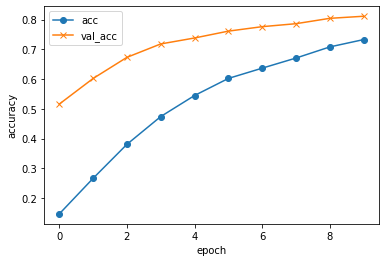

In [15]:
#ひな形

import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.layers import Activation, Dense, Dropout
from keras.models import Sequential, load_model
from keras import optimizers
from keras.utils.np_utils import to_categorical
%matplotlib inline

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784)[:6000]
X_test = X_test.reshape(X_test.shape[0], 784)[:1000]
y_train = to_categorical(y_train)[:6000]
y_test = to_categorical(y_test)[:1000]

model = Sequential()
model.add(Dense(256, input_dim=784))
model.add(Activation("sigmoid"))
model.add(Dense(128))
model.add(Activation("sigmoid"))
model.add(Dropout(rate=0.5))
model.add(Dense(10))
model.add(Activation("softmax"))

sgd = optimizers.SGD(lr=0.1)
model.compile(optimizer=sgd, loss="categorical_crossentropy",metrics=["accuracy"])

#epochs = 10を指定
history = model.fit(X_train, y_train, batch_size=500, epochs=10, verbose=1, validation_data=(X_test, y_test))

plt.plot(history.history["acc"], label="acc", ls="-", marker="o")
plt.plot(history.history["val_acc"], label="val_acc", ls="-", marker="x")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend()
plt.show()

## 深層学習の考え方
- 動物の神経ネットワークを参考にしたディープニュートラルネットワークというモデルを使う手法。
- 脳神経の再現ではなく、現在では精度を上げる研究がなされている。
- 問題の発見について従来は人間が指示して解決していたことを自動でやってのける。


### ニューロンについて
- 深層学習の細かい単位になっているのが、「ニューロン」
- 1950年代のころから考えられているもので、入力値に対してウェイトを付けて、ある値以上で信号を送る機能を持つもの
- これを何層も積み重ねていくことで複雑な問題を扱えるようになっていった過去を持つ
- 各ニューロンの重みやパラメータを機械的に調整することで分類や回帰を行っていく

### 誤差逆伝播法
- モデルは入力された値に対して、はじめは出鱈目な値を出力。
- 出力Yと正解用の教師データの誤差を小さくするように調整していく。
- 繰り返し多量にやっていくことでモデルが完成していく

### Kerasの導入
- TensorFlowを内包するツールで、書きやすくするためにできたものがKeras
- 直観的に簡潔に書けるもので、上記のように内包しているツールでもあるためラッパーと呼ばれる。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.layers import Activation, Dense, Dropout
from keras.models import Sequential, load_model
from keras import optimizers
from keras.utils.np_utils import to_categorical
from keras.utils.vis_utils import plot_model
%matplotlib inline

Using TensorFlow backend.


In [2]:
#データ用意
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784)[:6000]
X_test = X_test.reshape(X_test.shape[0], 784)[:1000]
y_train = to_categorical(y_train)[:6000]
y_test = to_categorical(y_test)[:1000]

### モデルの生成
- add関数はモデルの層を増やすもの
- 以下の画像のようなものを生成したい
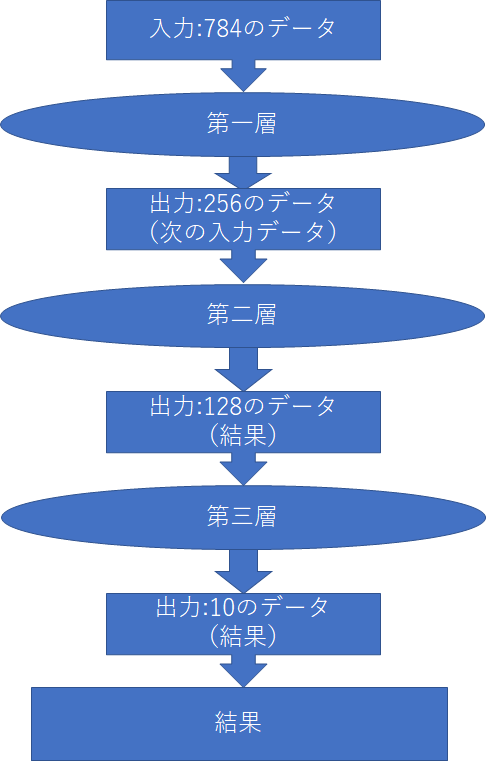


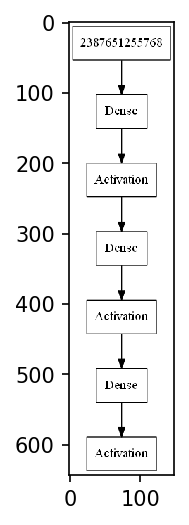

In [3]:
#モデルの生成
model = Sequential()
#一層目の入力ユニット数は784,一つ目の全結合層の出力数は256,使う活性化関数はシグモイド関数
model.add(Dense(256, input_dim=784))
model.add(Activation("sigmoid"))
#二層目の出力ユニットは128
model.add(Dense(128))
model.add(Activation("relu"))
#三層目の出力ユニットは10,関数は正規化指数関数
model.add(Dense(10))
model.add(Activation("softmax"))

sgd = optimizers.SGD(lr=0.1)
model.compile(optimizer=sgd, loss="categorical_crossentropy",metrics=["accuracy"])

#モデルの可視化
plot_model(model, "model125.png", show_layer_names=False)
image = plt.imread("model125.png")
plt.figure(dpi=150)
plt.imshow(image)
plt.show()

Epoch 1/3
6000/6000 [==============================] - 1s 139us/step - loss: 0.7361 - acc: 0.7552
Epoch 2/3
6000/6000 [==============================] - 1s 139us/step - loss: 0.7133 - acc: 0.7548
Epoch 3/3
6000/6000 [==============================] - 1s 125us/step - loss: 0.7010 - acc: 0.7628


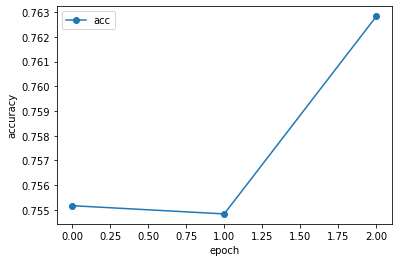

In [6]:
#epochs = 3を指定
history = model.fit(X_train, y_train,epochs=3, verbose=1)

plt.plot(history.history["acc"], label="acc", ls="-", marker="o")

plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend()
plt.show()

### モデルの評価
- 